![Airbnb image](https://miro.medium.com/v2/resize:fit:1200/1*PRPg5iDN4ZS6AIJOLsT8Qg.png)

# **Airbnb Bangkok - Listing Data Analytics**

Created By: Harish Muhammad

# **List of Contents**
* Business Understanding
* Data Understanding and Data Cleaning
* Data Analysis
* Insights and Key Recommendations
* References


# **Business Understanding**

**Context**

Airbnb is an online marketplace and hospitality service that allows people to rent out their properties or spare rooms to guests. Founded in 2007 by Brian Chesky, Joe Gebbia, and Nathan Blecharczyk in San Francisco, Airbnb has grown into one of the world's largest accommodation-sharing platforms. It operates through a website and mobile app, connecting hosts and travelers from around the globe. Guests can browse through various listings, ranging from entire homes and apartments to unique accommodations like treehouses and castles. Airbnb provides a platform for hosts to list their properties, set their own prices, and communicate with guests. It has transformed the way people travel by offering more personalized and unique lodging options compared to traditional hotels[1].



**Problem statement**

Post COVID-19 era, global tourism is recovering and bouncing back. Thailand securing its place between the top ten of fastest-growing countries on Airbnb’s accommodation searches for stays during Q1 in 2024 [2]. Among the top Thai destinations like Phuket, Pattaya etc, Bangkok was the most-booked on Airbnb. Furthermore, Bangkok ranked fifth in the Airbnb's list of top trending global travel spots in 2023 [3].


**Challenges and Opportunities for New Airbnb Partners**

While this influx of tourism is positive as more opportunities are coming, the new Bangkok listing providers will face some challenges.  They lack crucial knowledge about established customer preferences, local competition trends, and optimal pricing strategies.  Without this information, formulating effective business strategies and standing out in a competitive environment becomes difficult. To address these challenges and empower new Bangkok Airbnb partners, data analysis plays a critical role. By leveraging Airbnb's historical listing data, we can provide valuable insights and recommendations. This will equip them with the knowledge necessary to make informed decisions regarding factors such as:

* **Listing pattern and optimization**: Understanding the current local competition in their neighbourhood and identifying popular property types.

* **Pricing strategies**: Understanding local pricing trends and competitor analysis to set competitive yet profitable rates.

* **Guest communication**: Highlighting effective listing promotional language and descriptions that resonate with guests in Bangkok. 




**Goal: Guiding New Partners for Success**

Through this data analysis project, we aim to answer the following question:

**What are the key recommendations that can be provided to new listing providers embarking on their journey as Airbnb partners in Bangkok?**

By providing key recommendations, we can empower new partners to make well-informed business decisions and optimize their listings. This, in turn, will contribute to a thriving Airbnb ecosystem in Bangkok and foster a mutually beneficial long-term relationship between Airbnb and its partners.


# **Data Understanding and Data Cleaning**

Before conducting analysis, we need to perform data understanding and data cleaning. In this notebook, we are conducting data understanding and data cleaning simultanously. Data understanding step is performed to learn characteristics of the dataset including unique values, data types, and recognizing duplicates, missing values, outliers and anomalies. After recognizing them, we simultanously conduct the data cleaning step including handling duplicate, missing values, and anomalies. 


## **Dataset and libraries**

**Dataset and features**
*   Dataset and features description can be accessed from this private source: [airbnb dataset](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF)
*   Each rows in the dataset represent information of a listing including the characteristics, property type, listing prices, etc.






There are 16 columns. The description of each column from Airbnb listing - Bangkok dataset can be seen as below

|Column name | Descriptions|
|---|------------------------|
|**id**     | Airbnb's unique identification number generated for the residence name|
|**name**   | Advertised residence name|
|**host_id**| Host (residence owner) identification number|
|**host_name**| Host name |
|**neighborhood**| Residence neighbourhood|
|**latitude**| Residence latitude coordinate|
|**longitude**| Residence longitude coordinate |
|**room_type**| Type of room |
|**price**| Rental price in local currency (baht) |
|**minimum_nights**| Minimum number of nights to book |
|**number_of_reviews**| The number of reviews the listing has.|
|**last_review**| The date of the lastreview.|
|**calculated_host_listings_count**| The number of listings the host has in the current scrape in the city/region geography.|
|**avaliability_365**| Number of days of listing has been booked within 365 days.|
|**number_of_reviews_ltm**| The number of reviews in the last twelve months|


**Importing libraries and Initial setup**

In [49]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np
import missingno

# Library for statistical tests
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Customizing with 'ggplot' style
plt.style.use('ggplot')

In the beginning, we need to import all required libraries that will be used that consist of

* **Pandas** library is used for data analysis and data manipulation.
* **Matplotlib.pyplot** and **Seaborn** are used for plotting and creating graphics or visualizations.
* **Missingno** provides quick visualizations of missing data.
* **Folium** help visualize map or geographic location in Python.

**Loading data and Quick review**

Firstly, we need to load the dataset of Airbnb Bangkok listing and we can perform quick review for the first 5 rows on top and 5 rows on bottom of the dataset

In [51]:
# Loading the Airbnb dataset
df = pd.read_csv('Airbnb_Listings_Bangkok_raw.csv')

# Quick review of the initial data in the dataset
df.head()

# Quick review of the last data from the dataset
df.tail()

# Displaying the data
display(df.head(), df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,7.904745e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,7.904753e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,7.904755e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,7.904765e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Based on our brief observation from the 5 rows from top and the 5 rows from below of the dataset, we can see there are some missing values or 'NaN' in the columns of 'last_review' and 'reviews_per_month'. We can also notice, the column of 'name', contains Non-English alphabets.

## **Data Summarization**

**Initial Assesment**

After quick review, We want to check the number of rows and columns

In [52]:
# Calculating the number of rows and columns
# Dataframe dimension
print(f'Number of rows and columns {df.shape}')

Number of rows and columns (15854, 16)


We have found that there are 15854 rows and 16 columns in the dataset.



Now, let's check what are the 16 columns  

In [53]:
# Displaying columns of the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

We can also check the summary of the data

In [54]:
# Displaying the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  float64
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

We notice there are some information from the sumarization process of that consist of: 
* At the beginning, From 16 columns, we have 12 numerical columns (with data type of int64 and float64) and 4 categorical columns (with data type of object).    
* There are some data missing in the column of 'name', 'host_name', 'last_review', 'reviews_per_month' as these columns have less data than 15854. We will handle these missing values later after checking unique values and handling duplicated data.
* We have also checked the data type. There is an anomaly, like the 'last_review' column data type should be as a datetime, not as an object. However, we will conducting more analysis for treating this column later.
* Additional information, We will also add more columns such as 'salary_category', 'listing_in_english' and 'name_no_emoji'. We will explain this further in the chapter of data analysis

## **Checking unique values**

In [55]:
# Checking unique values from features
# Checking Characteristics of features or columns including unique values, data type and missing values

pd.DataFrame({
    'feature/column': df.columns.values,
    'data_type': df.dtypes.values,
    'negative_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'number_of_unique': df.nunique().values,
    'unique_value_sample': [df[col].unique() for col in df.columns]
})

,feature/column,data_type,negative_value,number_of_unique,unique_value_sample
0,id,float64,False,15854,"[27934.0, 27979.0, 28745.0, 35780.0, 941865.0,..."
1,name,object,False,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,int64,False,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,object,False,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,object,False,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,float64,False,9604,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,float64,False,10214,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,object,False,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,int64,False,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,int64,False,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


Based on the observation of unique values from data frame, we notice some finding such as,
* Low cardinality for a column like 'room_type'
* High cardinality for columns such as id, name, host_name, host_id, etc.  
* The number of unique value in 'ID' or listing ID is 15854, similar to the total number data indicates there is no duplicated data.

## **Handling duplicated data**

In [56]:
# Finding duplicated data of overall data
df.duplicated().sum()

0

In [57]:
# Finding duplicated data
# using the 'id' or listing id column as this feature must be unique
df.duplicated(['id']).sum()

0

we have confirmed there is no duplicated data in the dataset.

**Displaying statistical descriptive of both numerical and non-numerical data**

In [58]:
# Displaying statistical descriptive of the numerical data
df.describe()

# Displaying statistical descriptive of the categorical or non-numerical data
df.describe(include=['object'])

display(df.describe(),df.describe(include=['object']))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


From the statisical descriptive, We notice there are some anomalies that draw our attention, such as

* The minimum price is zero. It does not make sense as no one will give rent for free. This will have to be treated. Furthermore, the price feature has a wide range. The price has a Q3 of 2429 Baht, but the maximum price is 1.1 million Baht. Clearly indicate there are outliers.
* The minimum_nights also has a wide range maximum value of 1125 days, but the Q3 is at 7 days.
* The other features probably contain outliers too, but we will handle it specifically according to the required analysis

## **Handling anomaly**

**Handling anomaly (Listings where price == 0)**

We have dropped a row where price equals to zero.

In [59]:
# Checking and filtering listing where price == 0
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108.0,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


In [60]:
# Taking all dataset and Dropping rows with anomaly where price is equal to 0
df = df[df['price'] != 0].reset_index(drop=True)

In [61]:
# Confirming the number of data after dropping one row
df.shape

(15853, 16)

## **Handling missing values**

In [62]:
# Calculating the overall missing values in the dataframe
df.isnull().sum().sum()

11587

In [63]:
# Calculating missing value from every columns # Perlu dimprove
df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()

,index,Missing values
0,id,0
1,name,8
2,host_id,0
3,host_name,1
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


In [64]:
# Calculating the percentage of missing values from every columns
df_miss_percent =df.isna().sum()* 100/len(df)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'}).reset_index()


,index,Percentage of Missing values
0,id,0.000000
1,name,0.050464
2,host_id,0.000000
3,host_name,0.006308
4,neighbourhood,0.000000
5,latitude,0.000000
6,longitude,0.000000
7,room_type,0.000000
8,price,0.000000
9,minimum_nights,0.000000


**Number and percentage of missing value in overall data**

There are four columns that contain missing values consisting of 'name' (8 rows or 0.05%), 'host_name' (1 row), 'last_review' (5790 rows or 36.5%), and 'reviews_per_month' (5790 rows or 36.5%)









<Axes: >

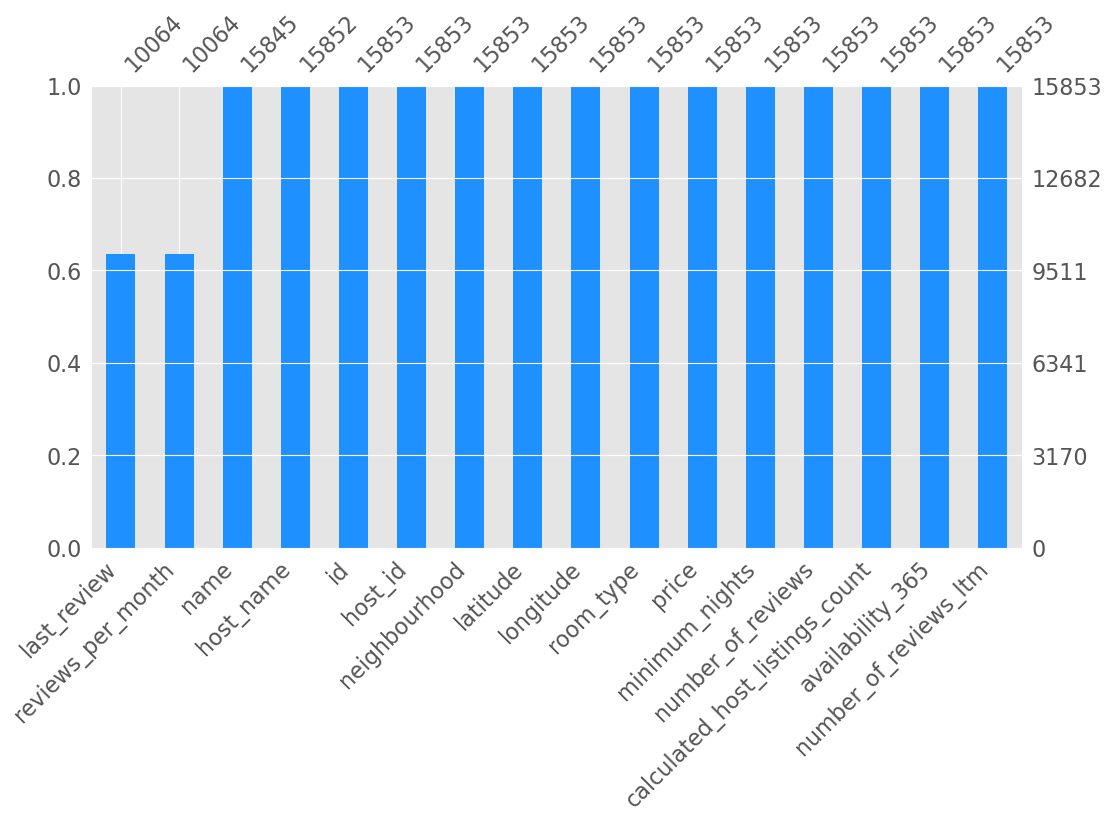

In [65]:
# Visualization of missing value proportion to overall data
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(12,6))

The 'last_review' and 'reviews_per_month' columns have the highest missing values in the entire dataframe

<Axes: >

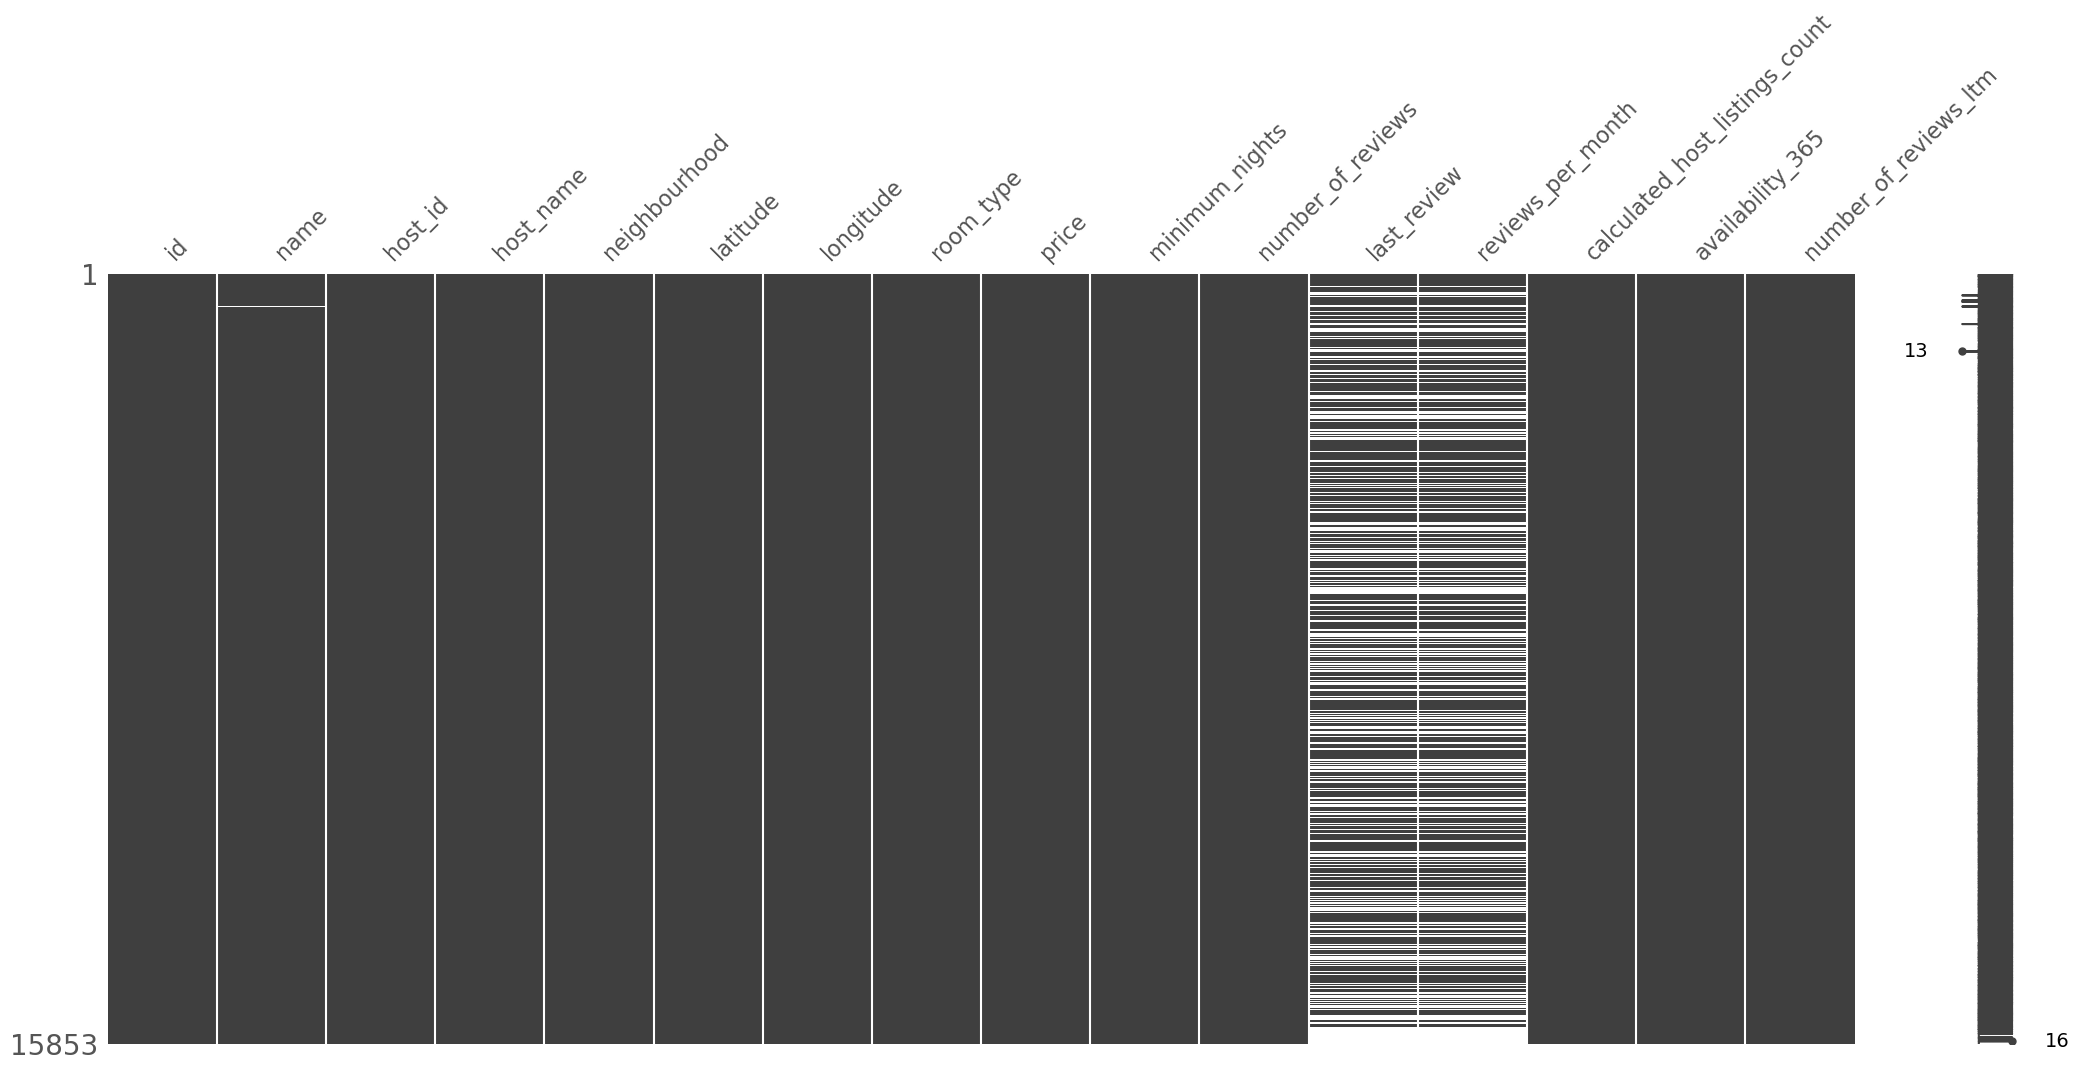

In [66]:
# Matrix plot
missingno.matrix(df)

<Axes: >

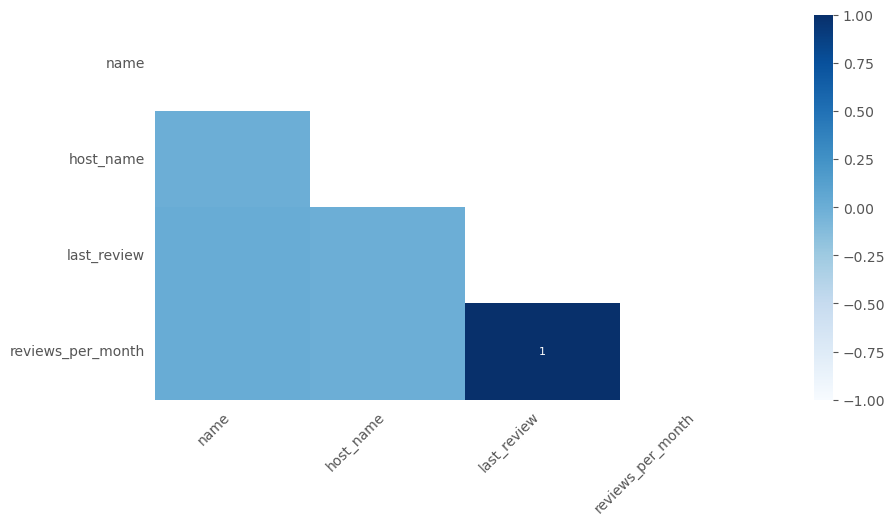

In [67]:
# Relationship between missing values
missingno.heatmap(df, cmap="Blues", figsize=(10,5), fontsize=10)

Based on the heatmap of missing values, there is a weak correlation between missing values of name vs host_name, name vs last_review, name vs review_per_months, host_name vs last_review, and host_name vs review_per_month (score near 0).

In addition, we can see positive strong correlation of missing values between last_review and reviews_per_month columns (score = 1)

**Handling of missing values in 'name' and 'host_name' columns**

Firstly, We are searching the rows with missing value in the column of 'name' and 'host_name'. Next, We decide to impute in the missing values of both column 'name' and 'host_name' with 'unknown', since we do not want to drop these rows.

In [68]:
# Searching the rows with missing value in the 'name' column
df[df['name'].isna() == True]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768.0,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818.0,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018.0,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415.0,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144.0,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742.0,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165.0,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743.0,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [69]:
# Showing the missing value in the 'host_name' column
df[df['host_name'].isna() == True]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464.0,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [70]:
# Treating missing values of column 'name' and 'host_name'
# Replace the missing value in the column 'name' with 'unknown'
df['name'].fillna('unknown', inplace=True)

# Replace the missing value in the column 'host_name' with 'unknown'
df['host_name'].fillna('unknown', inplace=True)

**Handling missing values in column of 'last_review' and 'reviews_per_month'**

We notice that there are 5700+ or 36.5% missing values of both 'last_review' and 'reviews_per_month' column. We are aware that these columns have large number of missing values, however we are trying to not dropping it since those data are very valuable. Now, we want to figure out how to handle them. Firstly, since the total number are same we notice that there is a possibility of relationship between both columns. Hence, we try to filter it with two conditions.

In [71]:
# Filtering with two conditions
df[(df['last_review'].isna() == True) & (df['reviews_per_month'].isna() == True)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1.738669e+06,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,9.592540e+05,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15849,7.904745e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15850,7.904753e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15851,7.904755e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Based on the result of previous filtering above, we can see that the rows with missing value in 'last_review' are similar with rows with missing value in 'reviews_per_month'

After that, we want to make sure again the relationship between remaining missing values.

<Axes: >

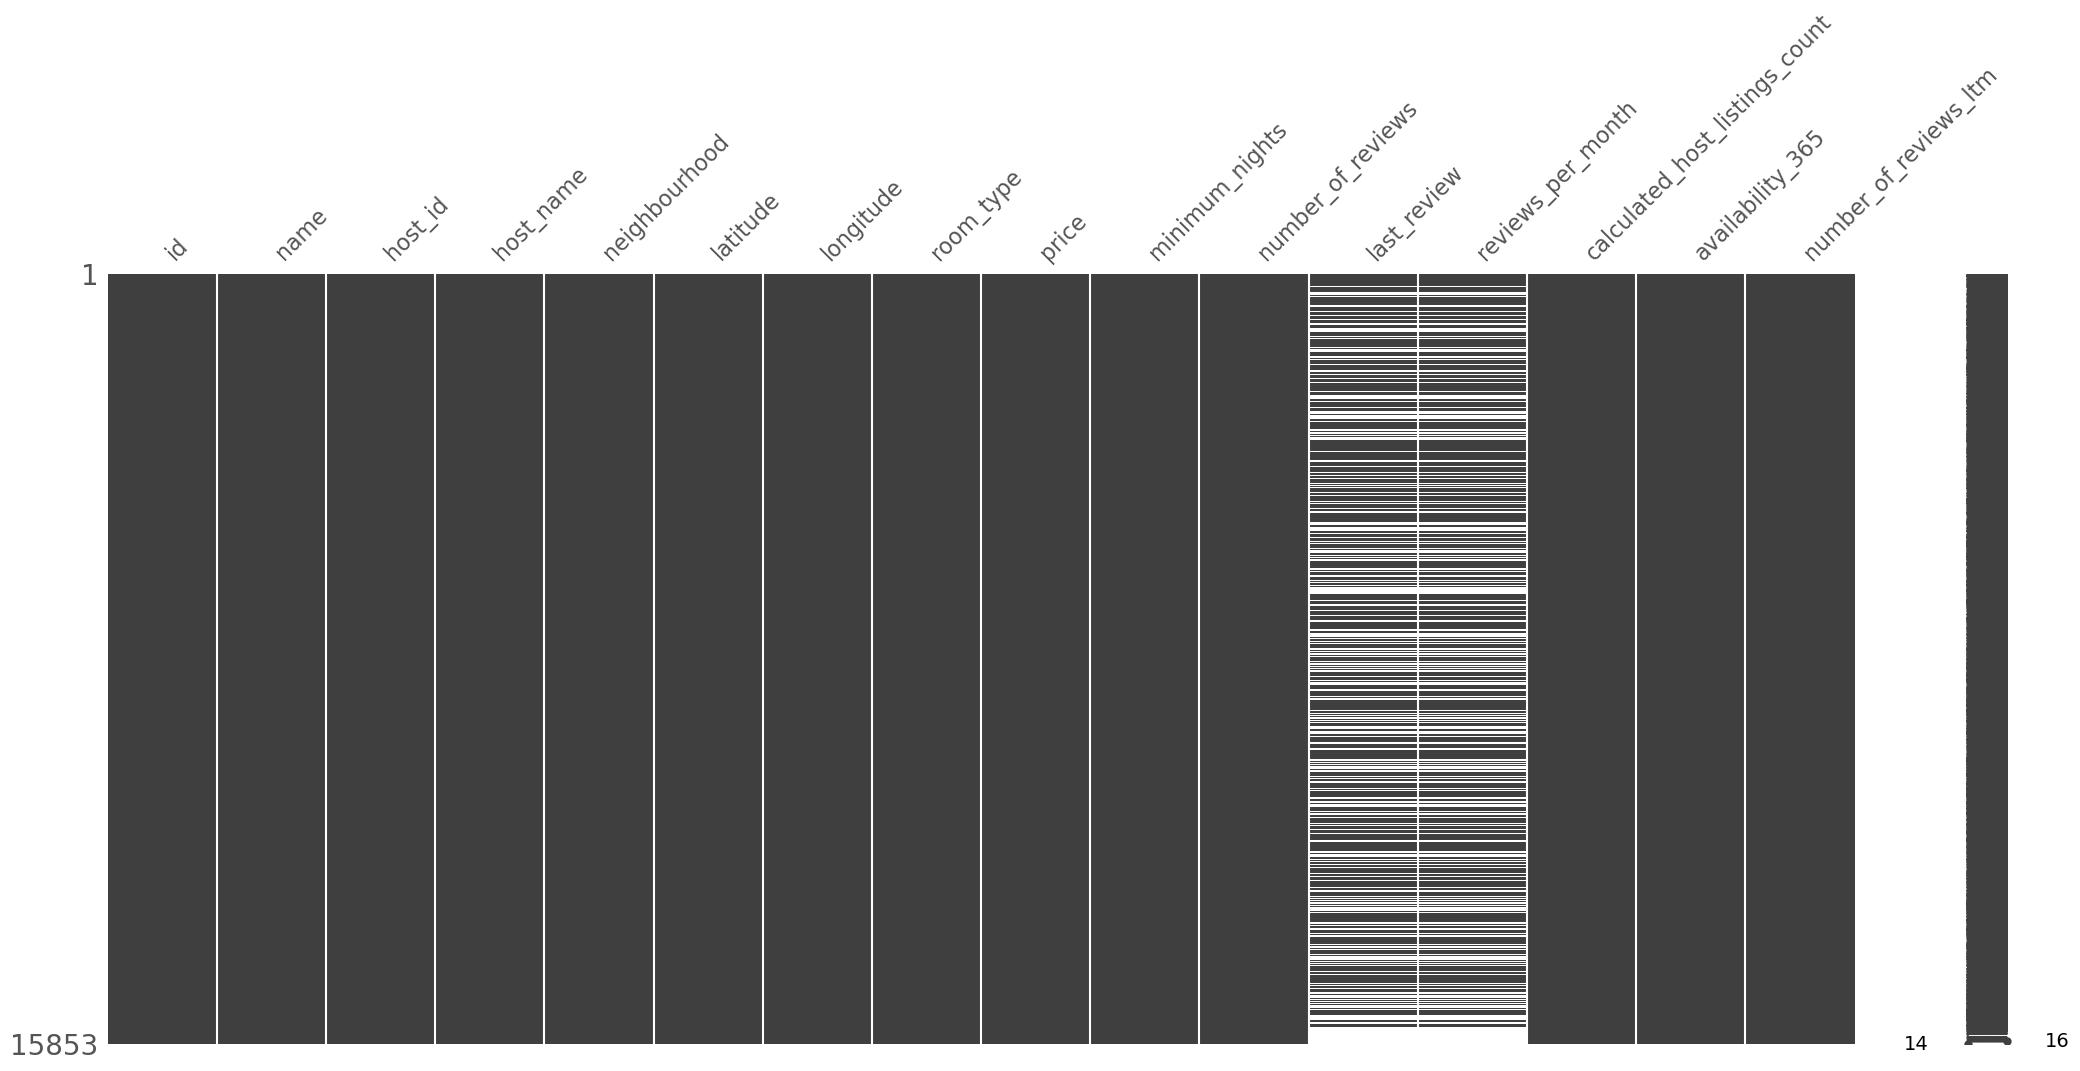

In [72]:
# Matrix plot
missingno.matrix(df)

<Axes: >

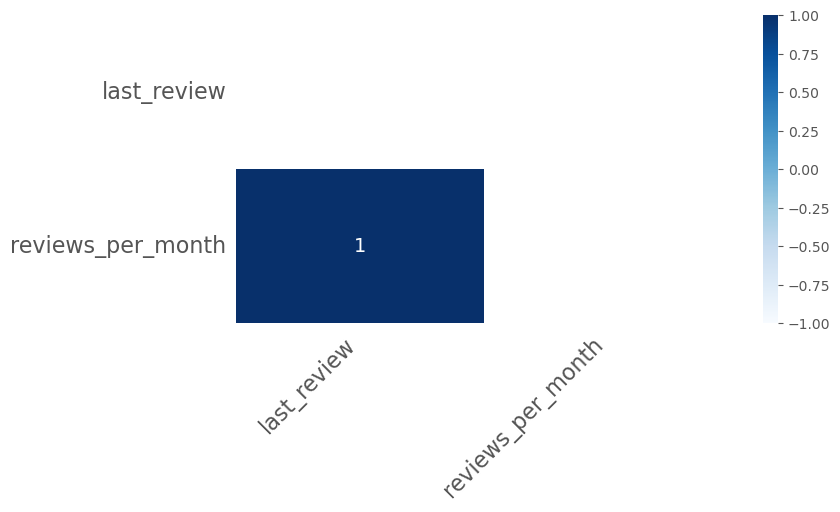

In [73]:
# Heatmap between two columns with missing values
missingno.heatmap(df, cmap="Blues", figsize=(8,4))

By using missingno matrix and missingno correlation heatmap above we can be sure that there are clear relationship between missing values and strong correlation of both columns 'last_review' and 'reviews_per_month'.




In addition to that, we can see there is also relationship between 'number_of_review' and 'last_review' with  'number_of_reviews'. This can be explained as when the rows where 'last_reviews' and 'reviews_per_month' columns are NAN or missing, the column of 'number_of_reviews' is equal to 0. Hence, probably these listings contain no reviews at all.

In [74]:
# Filtering with three conditions: 1. 'number_of_reviews' == 0, 2. 'last_review' == NaN 3.'reviews_per_month' == NaN
df[(df['number_of_reviews'] == 0) & (df['last_review'].isna() == True) & (df['reviews_per_month'].isna() == True)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1.738669e+06,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,9.592540e+05,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15849,7.904745e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15850,7.904753e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15851,7.904755e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


The rows shown above confirm that the three conditions previously mentioned are valid. Because of that, we decide to place a value of '0' to fill missing value in the column of 'reviews_per_month', since the value of '0' in number_of_reviews will not produce any reviews_per_month either or resulted in '0'.

However, we will not be handling the column 'last_reviews'. We decide to drop it because attempting to replace the columns with a value, such as 'unknown', may create inefficiencies during the data analysis section, as the dtype of the column will be converted to 'object'. This will require repeated conversions of the column's dtype back to datetime. Furthermore, there are over 5000+ missing dates on this column, out of 15000+ data, which makes conversion of the data unreasonable, and may lead to biased analysis, in turn leading to incorrect insights.

In [75]:
# Imputation method for 'reviews_per_month'
df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)

In [76]:
# Dropping the columns of 'last_review'
df.drop(columns=['last_review', 'id', 'host_id', 'host_name'], inplace=True)

In [77]:
# Reviewing the number of missing values after the dropping process
df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()

,index,Missing values
0,name,0
1,neighbourhood,0
2,latitude,0
3,longitude,0
4,room_type,0
5,price,0
6,minimum_nights,0
7,number_of_reviews,0
8,reviews_per_month,0
9,calculated_host_listings_count,0


After handling anomally such as deleting a row where price equal to 0, replacing missing values of column 'name' and 'host_name' of unknown, performing imputation to the column of 'reviews_per_month' with 0, dropping unnecessary columns ('id', 'host_id', 'host_name'), dropping untreated column ('last_review'), finally, all missing values have been treated.

## **Examining Data Distribution**

Before continuing to the step of data analysis, we want to examine data distribution of all columns. We will make histogram of the column (checking through visualization) and conduct normality test (Agostino-Pearson test) to check whether the data are normally distributed or not.

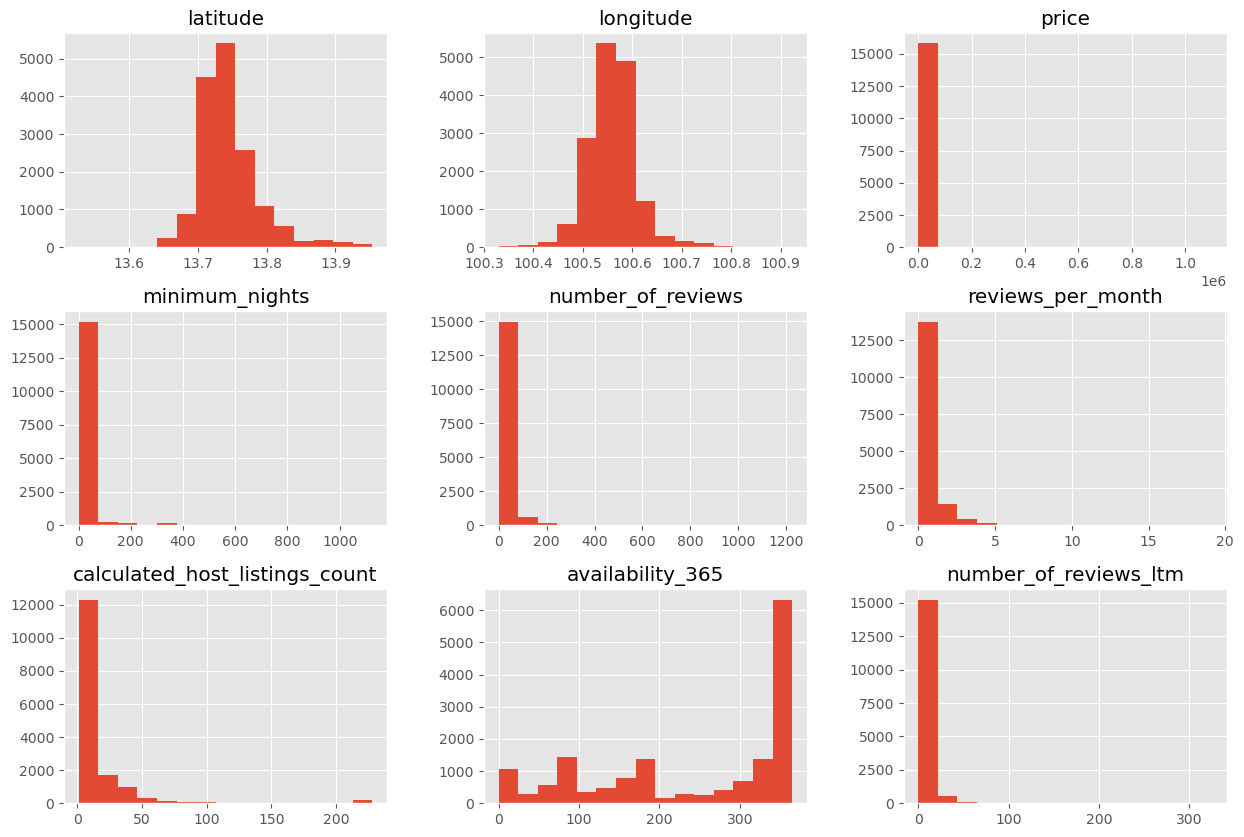

In [78]:
# ploting the histogram of numerical columns
# Checking data distribution of numerical columns via visual observation
df.hist(bins=15, figsize=(15,10))
plt.show()

In [79]:
numerical = [var for var in df.columns if df[var].dtypes != 'object']

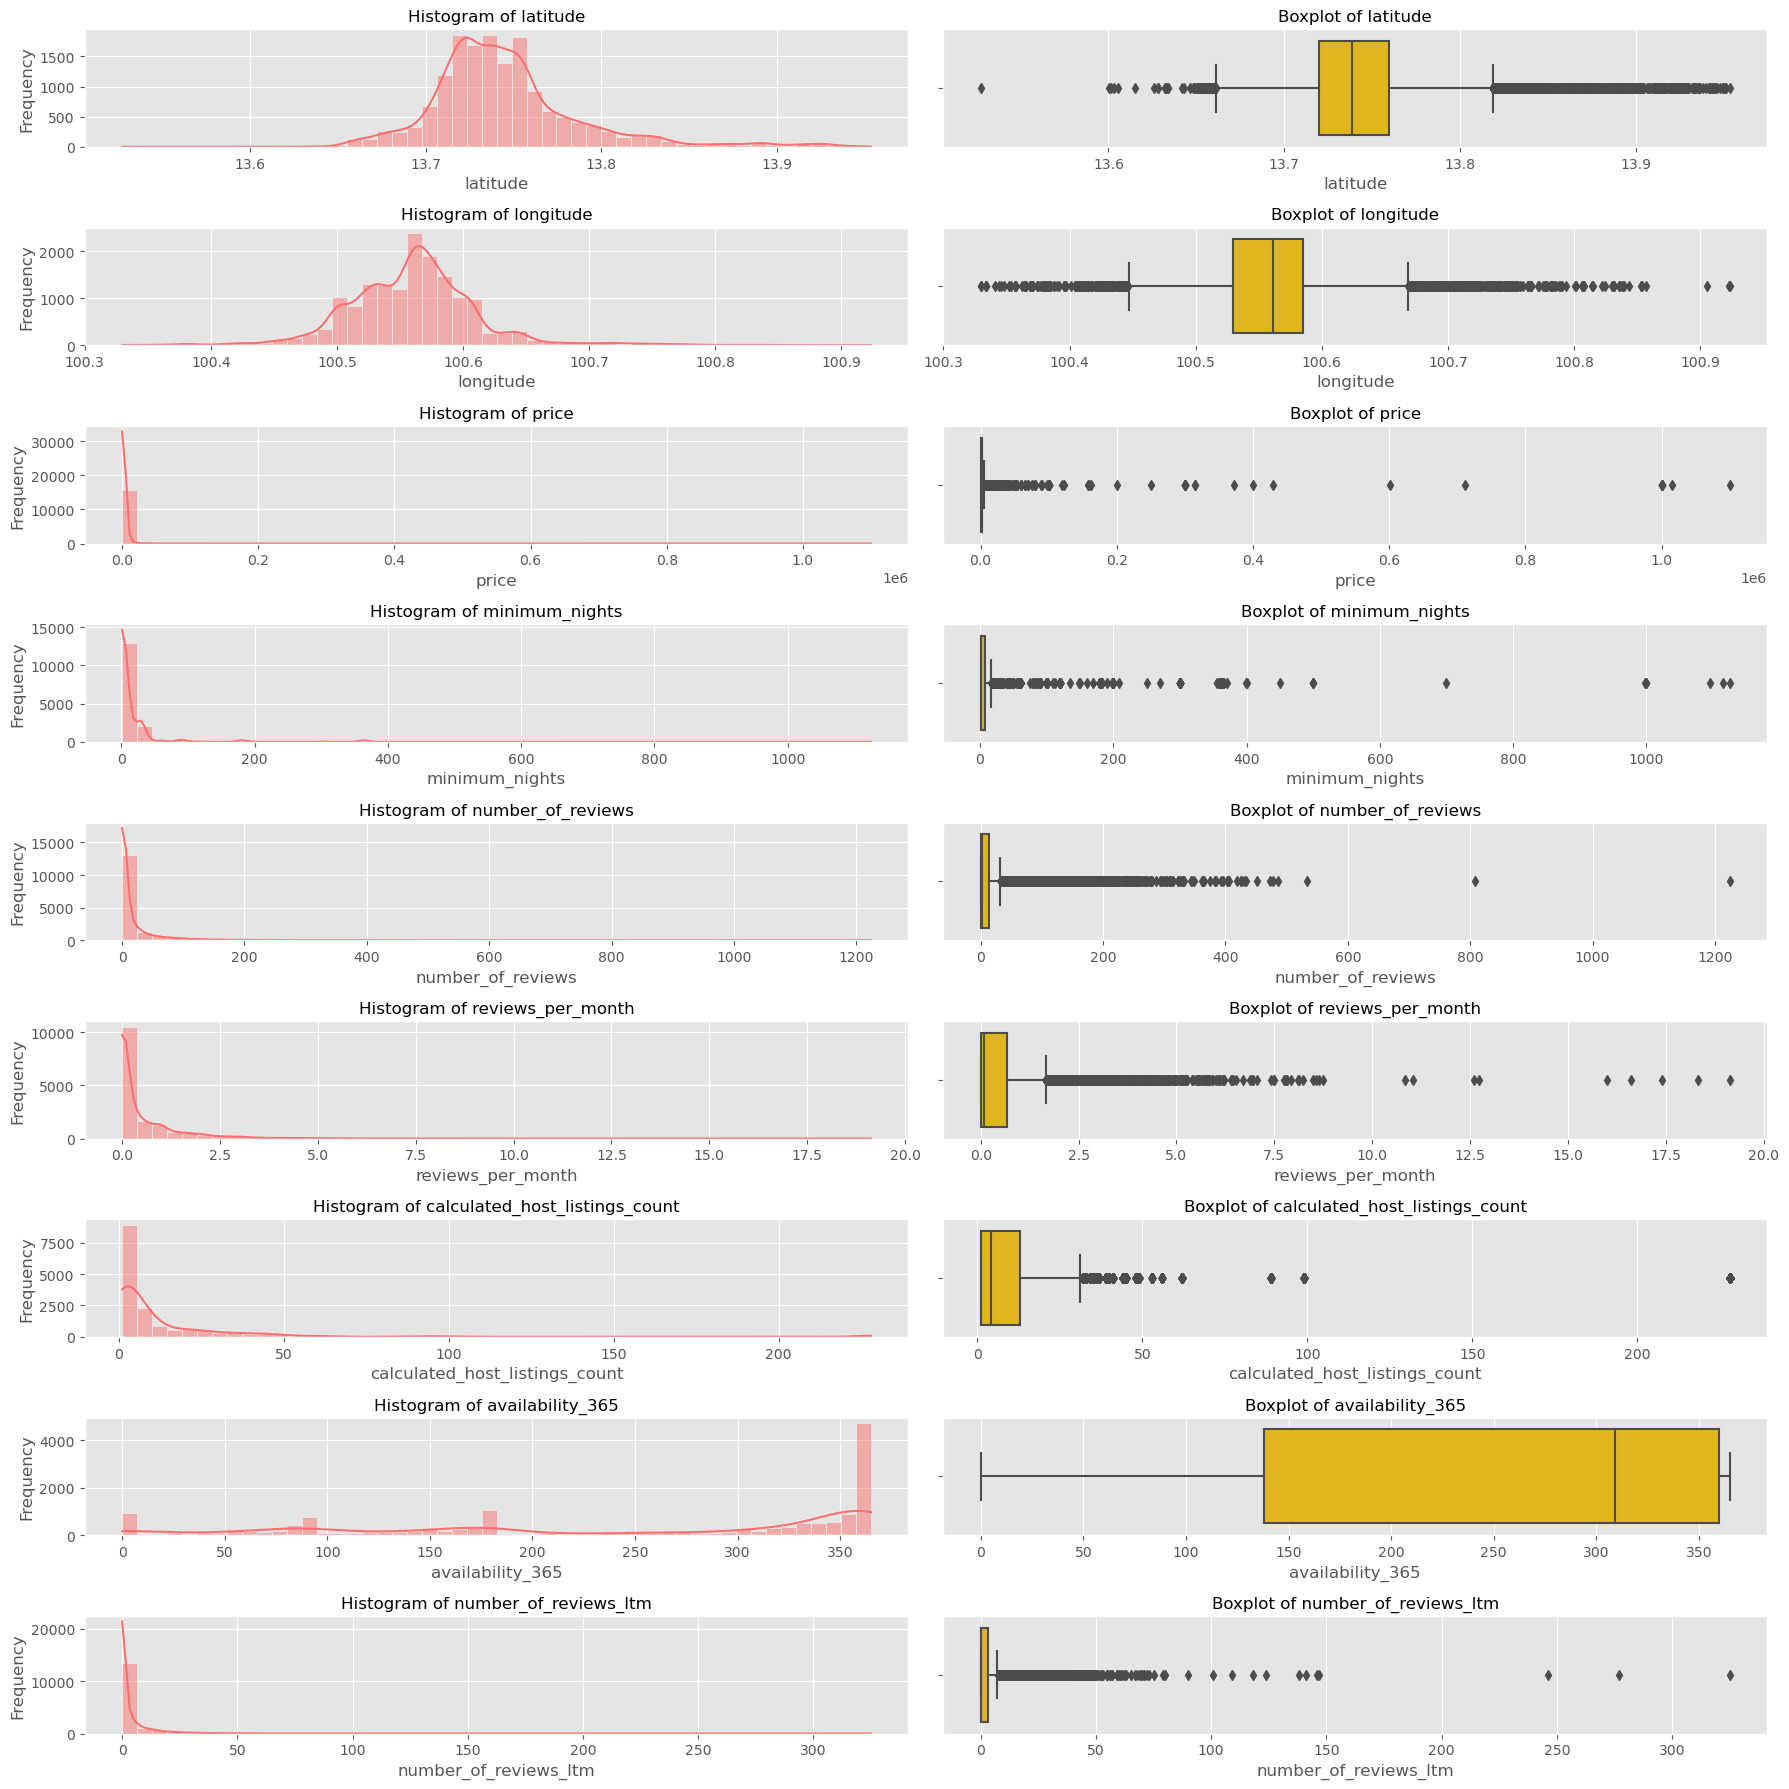

In [80]:
# Data distribution
# Comparison between histogram and boxplot
plt.figure(figsize=(18, 18))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [81]:
# Normal test for checking data distribution
# Examining the distribution of the data by using normality test or Agostino-Pearson test

# Creating Numeric variable
numerical = [var for var in df.columns if df[var].dtypes != 'object']

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson test", 'P-value', 'Distribution'])
dist_df

,Feature,D'Agostino-Pearson test,P-value,Distribution
0,latitude,4356.959558,0.0,Not Normally Distributed
1,longitude,2077.433465,0.0,Not Normally Distributed
2,price,43046.717756,0.0,Not Normally Distributed
3,minimum_nights,22190.129178,0.0,Not Normally Distributed
4,number_of_reviews,19163.172470,0.0,Not Normally Distributed
5,reviews_per_month,15621.035696,0.0,Not Normally Distributed
6,calculated_host_listings_count,16474.501173,0.0,Not Normally Distributed
7,availability_365,12885.350519,0.0,Not Normally Distributed
8,number_of_reviews_ltm,24895.698981,0.0,Not Normally Distributed


Based on table above, the data distribution from these numerical columns are not normally distributed.

## **Recognizing outliers**

In [82]:
# Examining the presence of outliers
# Handling outlier with IQR
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []
numerical = [var for var in df.columns if df[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df


,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,latitude,1094,6.90,13.660975,13.818615
1,longitude,602,3.80,100.446500,100.668340
2,price,1403,8.85,-1393.500000,4722.500000
3,minimum_nights,3168,19.98,-8.000000,16.000000
4,number_of_reviews,2240,14.13,-19.500000,32.500000
5,reviews_per_month,1471,9.28,-1.005000,1.675000
6,calculated_host_listings_count,1832,11.56,-17.000000,31.000000
7,availability_365,0,0.00,-195.000000,693.000000
8,number_of_reviews_ltm,2219,14.00,-4.500000,7.500000


We admit there are outliers in most of our features. We do not want to eliminate outliers as their presence may lead to important insights as well.

-To be continued to data analysis part 1-